In [48]:
import numpy as np
import torch as th
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
from torchvision.io import read_image
from pathlib import Path
import cv2
from torchvision.utils import make_grid


plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams["figure.figsize"] = (20, 20)   # figsize

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

[['42022.jpg' 8.481700287326827]
 ['9629.jpg' 8.46526838144226]
 ['16177.jpg' 8.30883471018521]
 ['24750.jpg' 7.811802972893543]
 ['34765.jpg' 7.668337381685788]]
[['31402.jpg' -4.858566149922109]
 ['3819.jpg' -4.912521948825733]
 ['45182.jpg' -4.940842814153032]
 ['26571.jpg' -4.951273075917054]
 ['2773.jpg' -4.989461058405101]]
Min-Max c-values:  -4.989461058405101 8.481700287326827


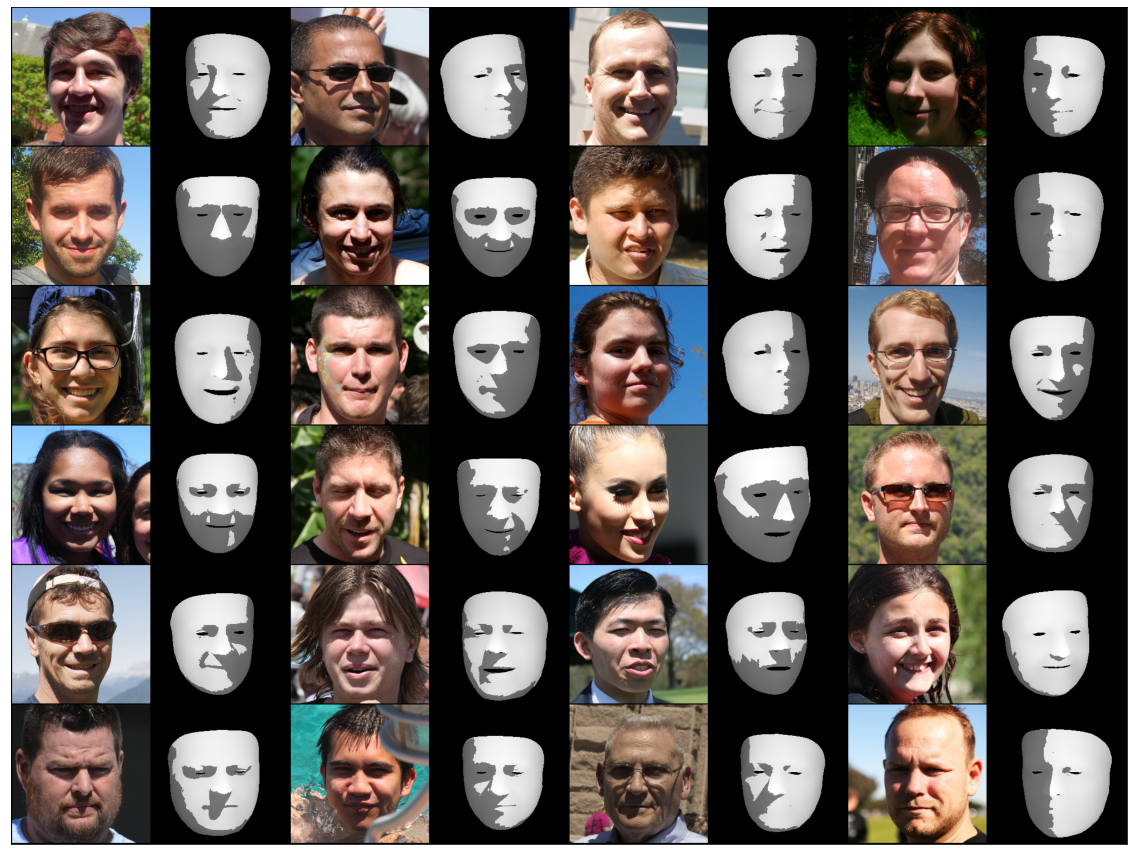

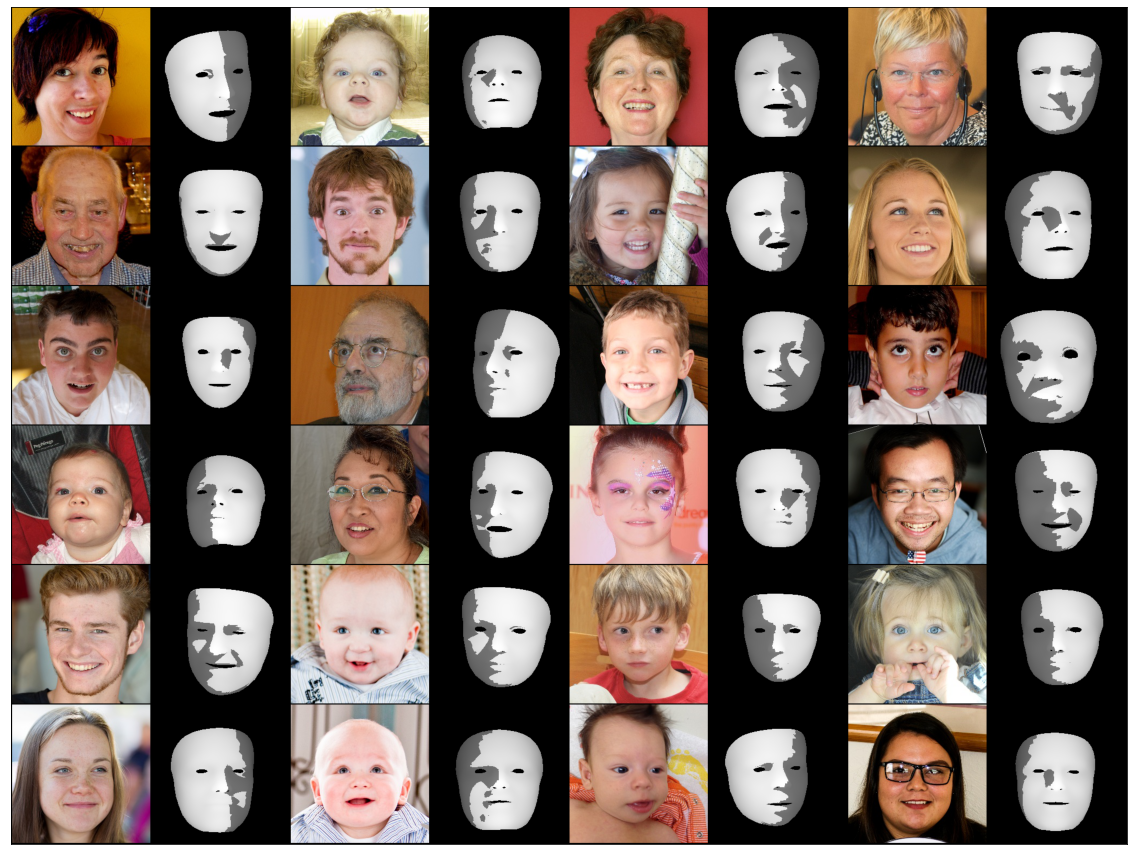

In [49]:
data_path = '/data/mint/DPM_Dataset/ffhq_256_with_anno/'
set_ = 'train'
c_p = f'{data_path}/params/{set_}/ffhq-{set_}-shadow-anno.txt'
img_p = f'{data_path}/ffhq_256/{set_}/'
ray_p = f'{data_path}/shadow_masks/{set_}/'

c = pd.read_csv(c_p, sep=' ', header=None, names=['image_name', 'c_val'])
c_sorted = c.sort_values(by=['c_val'], ascending=False)
print(c_sorted.head(5).values)
print(c_sorted.tail(5).values)
print("Min-Max c-values: ", c_sorted['c_val'].min(), c_sorted['c_val'].max())

n = 24
img_top_n = [read_image(f'{img_p}/{c_sorted.iloc[i, 0]}') for i in range(n)]
ray_top_n = [read_image(f"{ray_p}/{c_sorted.iloc[i, 0].replace('.jpg', '.png')}") for i in range(n)]
img_bot_n = [read_image(f'{img_p}/{c_sorted.iloc[i, 0]}') for i in range(-1, -n-1, -1)]
ray_bot_n = [read_image(f"{ray_p}/{c_sorted.iloc[i, 0].replace('.jpg', '.png')}") for i in range(-1, -n-1, -1)]

# Combined n list into 1 list
vis_top_n = sum([[img_top_n[i], ray_top_n[i]] for i in range(n)], [])
vis_bot_n = sum([[img_bot_n[i], ray_bot_n[i]] for i in range(n)], [])

show(make_grid(vis_top_n))
show(make_grid(vis_bot_n))

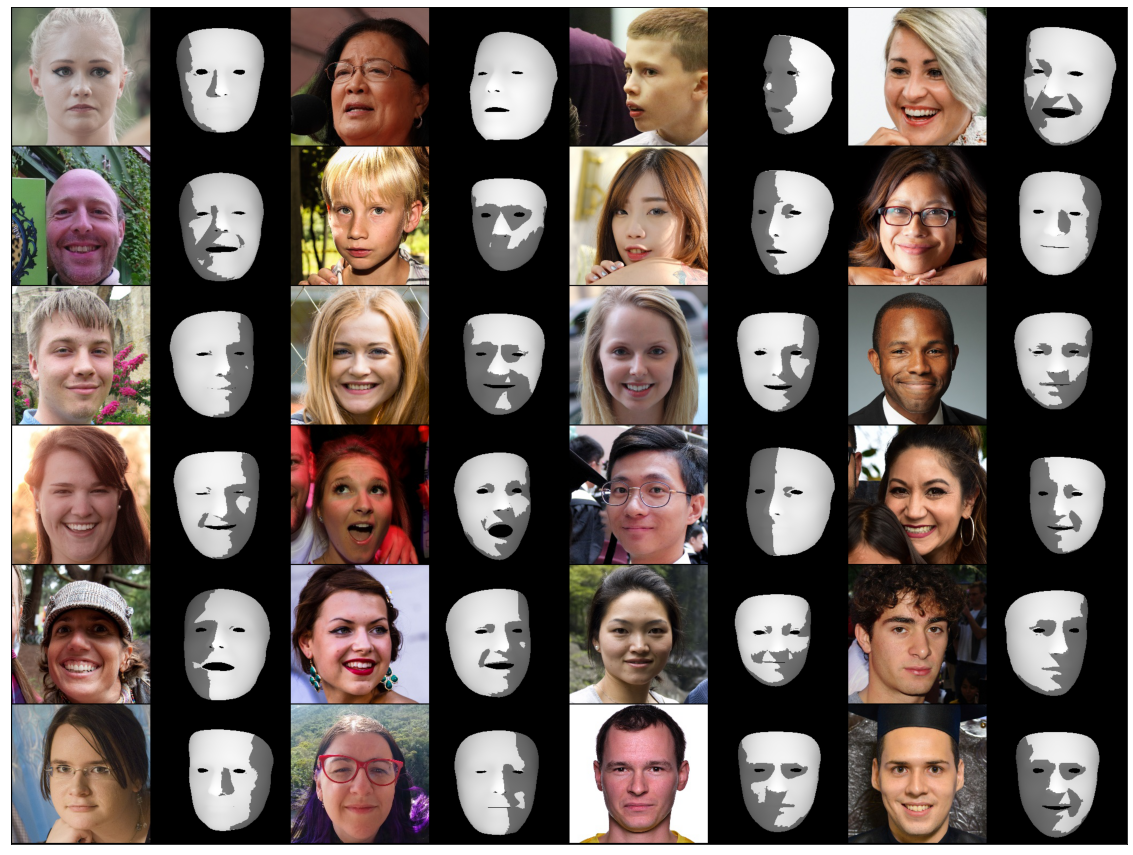

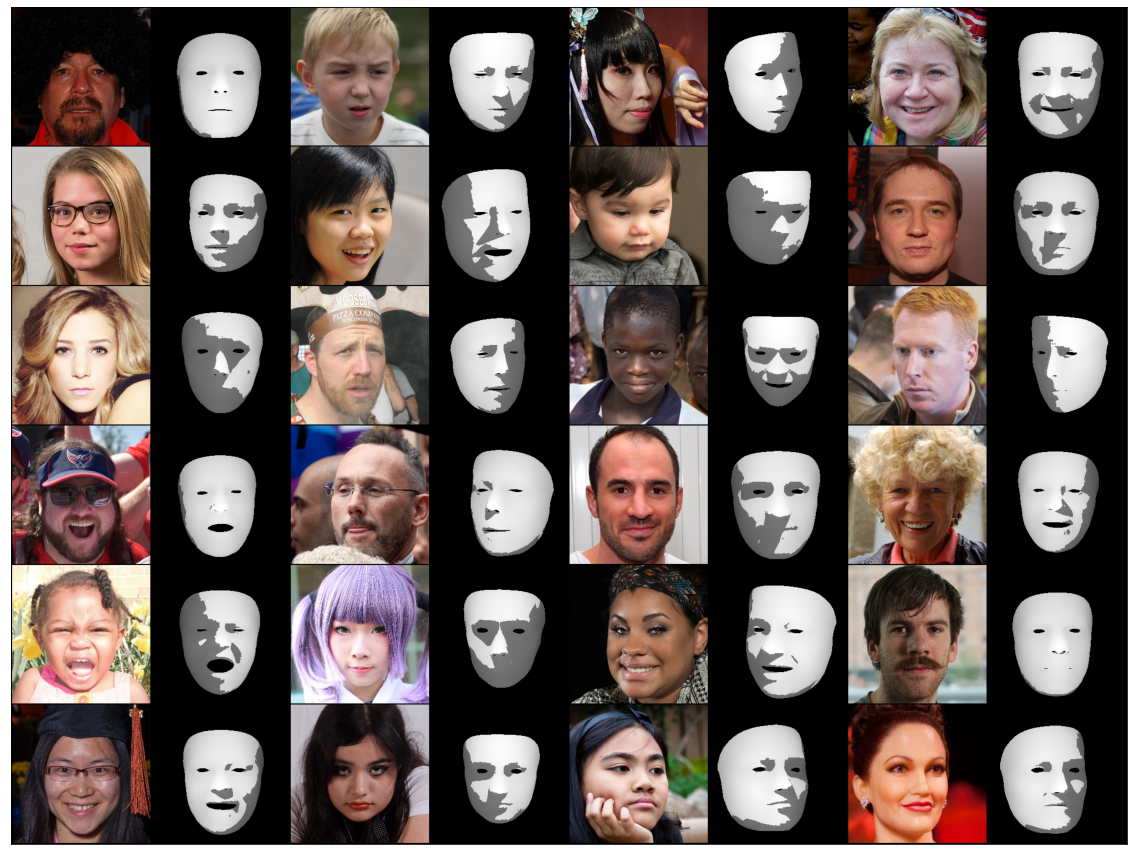

In [36]:
c_big_zero = c[c['c_val'] >= 0].sort_values(by=['c_val'], ascending=True)
c_small_zero = c[c['c_val'] < 0].sort_values(by=['c_val'], ascending=False)
n = 24
img_big_zero = [read_image(f'{img_p}/{c_big_zero.iloc[i, 0]}') for i in range(n)]
ray_big_zero = [read_image(f"{ray_p}/{c_big_zero.iloc[i, 0].replace('.jpg', '.png')}") for i in range(n)]
img_small_zero = [read_image(f'{img_p}/{c_small_zero.iloc[i, 0]}') for i in range(n)]
ray_small_zero = [read_image(f"{ray_p}/{c_small_zero.iloc[i, 0].replace('.jpg', '.png')}") for i in range(n)]

vis_big_zero = sum([[img_big_zero[i], ray_big_zero[i]] for i in range(n)], [])
vis_small_zero = sum([[img_small_zero[i], ray_small_zero[i]] for i in range(n)], [])

show(make_grid(vis_big_zero))
show(make_grid(vis_small_zero))

In [50]:
# Create reshadow images on FFHQ - Validation set
import json
if set_ == 'valid':
    out_dict = {"pair":{}}

    for i, name in enumerate(c['image_name']):
        out_dict['pair'][f'pair{i+1}'] = {
            "src": name,
            "dst": '60000.jpg' # Mocking the dst image since reshadow does not require dst image
        }
    print(out_dict)

    json.dump(out_dict, open(f'/home/mint/Dev/DiFaReli/difareli-faster/sample_scripts/default/sample_json/reshadow_ffhq_validset.json', 'w'), indent=4)

else: 
    # Create reshadow images on FFHQ - Train set
    out_dict = {"pair":{}}

    for i, name in enumerate(c['image_name']):
        out_dict['pair'][f'pair{i+1}'] = {
            "src": name,
            "dst": '0.jpg' # Mocking the dst image since reshadow does not require dst image
        }
    print(out_dict)

    json.dump(out_dict, open(f'/home/mint/Dev/DiFaReli/difareli-faster/sample_scripts/default/sample_json/reshadow_ffhq_trainset.json', 'w'), indent=4)

{'pair': {'pair1': {'src': '0.jpg', 'dst': '0.jpg'}, 'pair2': {'src': '1.jpg', 'dst': '0.jpg'}, 'pair3': {'src': '2.jpg', 'dst': '0.jpg'}, 'pair4': {'src': '3.jpg', 'dst': '0.jpg'}, 'pair5': {'src': '4.jpg', 'dst': '0.jpg'}, 'pair6': {'src': '5.jpg', 'dst': '0.jpg'}, 'pair7': {'src': '6.jpg', 'dst': '0.jpg'}, 'pair8': {'src': '7.jpg', 'dst': '0.jpg'}, 'pair9': {'src': '8.jpg', 'dst': '0.jpg'}, 'pair10': {'src': '9.jpg', 'dst': '0.jpg'}, 'pair11': {'src': '10.jpg', 'dst': '0.jpg'}, 'pair12': {'src': '11.jpg', 'dst': '0.jpg'}, 'pair13': {'src': '12.jpg', 'dst': '0.jpg'}, 'pair14': {'src': '13.jpg', 'dst': '0.jpg'}, 'pair15': {'src': '14.jpg', 'dst': '0.jpg'}, 'pair16': {'src': '15.jpg', 'dst': '0.jpg'}, 'pair17': {'src': '16.jpg', 'dst': '0.jpg'}, 'pair18': {'src': '17.jpg', 'dst': '0.jpg'}, 'pair19': {'src': '18.jpg', 'dst': '0.jpg'}, 'pair20': {'src': '19.jpg', 'dst': '0.jpg'}, 'pair21': {'src': '20.jpg', 'dst': '0.jpg'}, 'pair22': {'src': '21.jpg', 'dst': '0.jpg'}, 'pair23': {'src': '